In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('ready_data.csv',index_col=0)

In [3]:
data = data[['price_per_square', 'squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km']]

# PRICE_PER_SQUARE

In [5]:
data = data[data['price_per_square']>= 30000.0]
data = data[data['price_per_square']<=450000.0]

Q1 = data['price_per_square'].quantile(0.05)
Q3 = data['price_per_square'].quantile(0.95)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price_per_square'] >= lower_bound) & (data['price_per_square'] <= upper_bound)]

# SQUARES

In [6]:
data.squares.describe()

count    984.000000
mean     129.974339
std       95.664633
min        4.000000
25%       66.862500
50%       99.860000
75%      165.187500
max      530.000000
Name: squares, dtype: float64

In [7]:
data = data[data['squares']<=200]

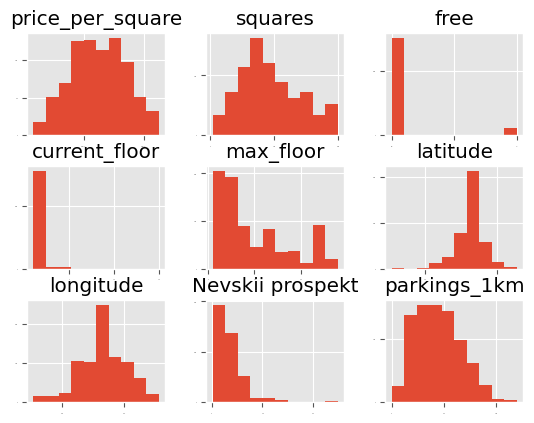

In [10]:
# histograms
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

In [8]:
data.squares.describe()

count    814.000000
mean      94.597727
std       46.787664
min        4.000000
25%       60.887500
50%       87.250000
75%      127.900000
max      200.000000
Name: squares, dtype: float64

# CURRENT_FLOOR и FREE

In [11]:
data = data[['price_per_square', 'squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km']]

CURRENT FLOOR не показала себя важным, как и free - наличие данных факторов было исключительно ввиду их изначального наличия. 
# оБЬЯСНИТЬ ПОЗЖЕ

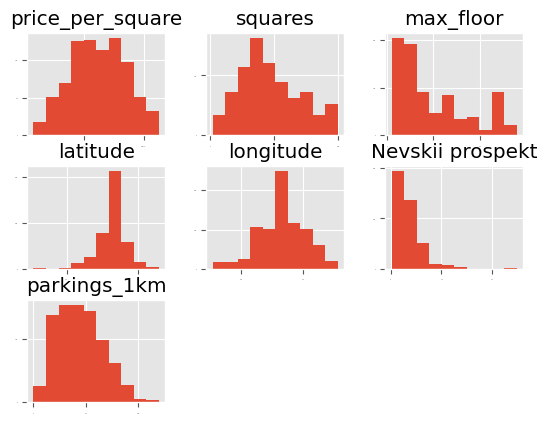

In [12]:
# histograms
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

убирать макс этаж - слишком вредно для данных - показывает относительную новизну здания и соотв сильно влияет, что мы заметили при прогонах модели.
Координаты тем более.

# Nevskiy

In [13]:
data['Nevskii prospekt'].describe()

count    814.000000
mean       8.537494
std        7.475832
min        0.500000
25%        3.432500
50%        6.940000
75%       11.270000
max       62.240000
Name: Nevskii prospekt, dtype: float64

In [16]:
data = data[data['Nevskii prospekt']<=30]

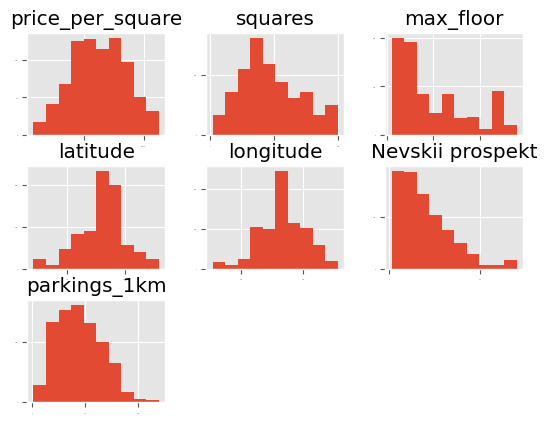

In [17]:
# histograms
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

# Прогоны

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error 
import statsmodels.api as sm

In [18]:
data.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km'],
      dtype='object')

In [23]:
df_1 = data.copy()

# Определяем зависимые и не зависимые переменные
X = df_1[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt']]
y = df_1['price_per_square']

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем модель
model_1 = LinearRegression()
model_1.fit(X_scaled, y)

# Получаем коэфф. / веса параметров
coefficients = model_1.coef_
print(coefficients,'\n')

# Свободный коэф.
intercept = model_1.intercept_
print(intercept)

[ -7932.0825994   26159.89177604 -15392.58555991  -5887.99213352
 -22274.98745516] 

251076.9038701622


In [24]:
X = sm.add_constant(np.array(X_scaled))
est = sm.OLS(y, X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       price_per_square   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     21.22
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           5.94e-20
Time:                        02:08:15   Log-Likelihood:                -10228.
No. Observations:                 801   AIC:                         2.047e+04
Df Residuals:                     795   BIC:                         2.050e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.511e+05   3015.498     83.262      0.0

In [25]:
predictions = result.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
print(rmse)
print(mean_absolute_error(y, predictions))
print(mean_absolute_percentage_error(y, predictions))

85024.20641943248
69316.35390398045
0.38550381151491736
